**Лабораторная работа № 2.**

**Линейная нейронная сеть. Правило обучения Уидроу-Хоффа**

Ивченко Анна группа М8О-408Б-20

вариант 9

Целью работы является исследование свойств линейной нейронной сети и алгоритмов ее
обучения, применение сети в задачах аппроксимации и фильтрации.

# Задание 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from tqdm import tqdm

Определим входной и выходной сигнылы

In [3]:
def x1(t):
    return np.sin(t**2 - 2*t + 3)
def x2(t):
  return np.sin(t**2 - 2*t + 3)

def y(t):
  return 0.25 * np.sin(t**2 - 2*t)

h = 0.025
t1 = (0, 6)
t2 = (0, 6)


Датасеты для обучения

In [7]:
T = np.linspace(t1[0], t1[1], int((t1[1] - t1[0]) / h))
X = x1(T)
T2 = np.linspace(t2[0], t2[1], int((t2[1] - t2[0]) / h))
X2 = x2(T2)
Y = y(T2)

x_train_, y_train_ = gen_data(X, 5)
x_train = torch.Tensor(x_train_)
y_train = torch.Tensor(y_train_)

Создадим последовательные срезы длины 5, с индекса 0 до len(x) - 5 - в итоге у нас 245 таких последовательностей по 5 элементов в каждой

In [5]:
def gen_data(x, delay):
    x_train = np.array([np.hstack([x[i:i+delay]]) for i in range(len(x) - delay)])
    y_train = x[delay:]
    return x_train, y_train


In [6]:
def gen_data2(x,y, delay):
    x_train = np.array([np.hstack([x[i:i+delay]]) for i in range(len(x) - delay)])
    y_train = y[delay:]
    return x_train, y_train


In [8]:
class Parsepron(nn.Module):
  def __init__(self, in_features: int, out_features: int, bias: bool = True):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(in_features, out_features))
    self.bias = bias
    if bias:
      self.bias_term = nn.Parameter(torch.randn(out_features))

  def forward (self, x):
    x = x @ self.weight
    if self.bias:
      x = x + self.bias_term
    return x


In [9]:
par = Parsepron(5, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(par.parameters(), lr=0.01)


Обучение модели

In [10]:
def fit(model, x_train, y_train, criteriy, optimizer, err):
  loss = []
  #log_template = '\nEpoch {ep:03d} train_loss: {t_loss:0.41}'
  for epoch in range(err):
    optimizer.zero_grad()
    predictions = model(x_train).flatten()
    loss_ = criteriy(predictions, y_train)
    loss_.backward()
    loss.append(loss_.item())
    optimizer.step()

      #tqdm.write(log_template.format(ep=epoch, t_loss = loss_))
  return loss



In [11]:
loss = fit(par, x_train, y_train,criterion ,optimizer , 1000)

построим график для функции потерь

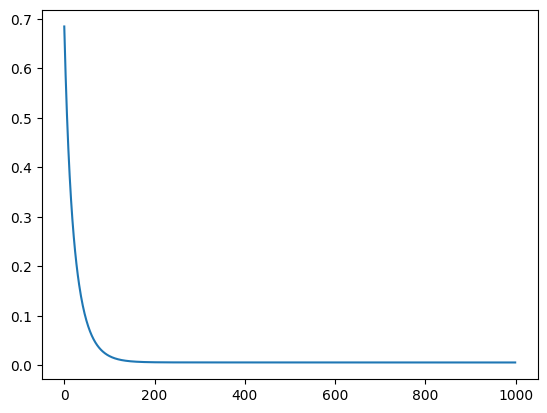

In [12]:
plt.plot(loss)
plt.show()

Посмотрим на график, где приведены реальные и предсказанные значения

In [13]:
def plot_function(t, x, x_train, D):
  plt.figure(figsize=(10, 10))
  plt.plot(t[D:], x[D:], color = 'aqua')
  plt.plot(t[D:], x_train.detach(), color = 'indigo')
  plt.show()

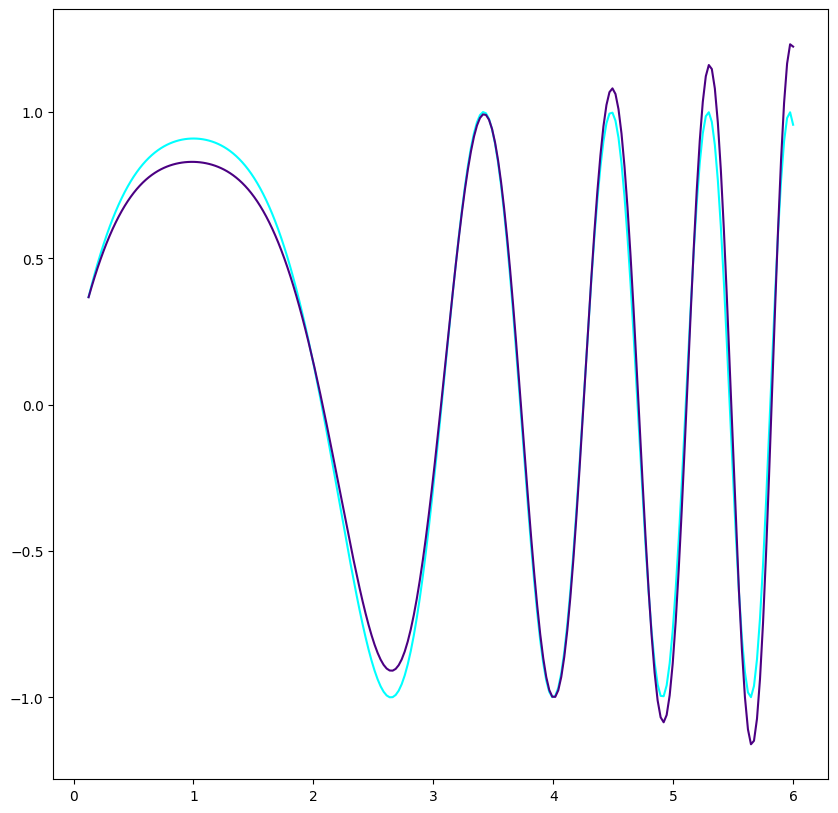

In [14]:
plot_function(T, X, par(x_train), 5)

# Задание 2

Сгенерируем новый датасет при D = 3 по условию задания

In [15]:
x_train_, y_train_ = gen_data(X, 3)
x_train = torch.Tensor(x_train_)
y_train = torch.Tensor(y_train_)

Зададим парсептрон

In [16]:
par = Parsepron(3, 1)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(par.parameters(), lr=0.01)


и обучаем модель

In [17]:
loss = fit(par, x_train, y_train,criterion ,optimizer , 1000)

построим график ошибок

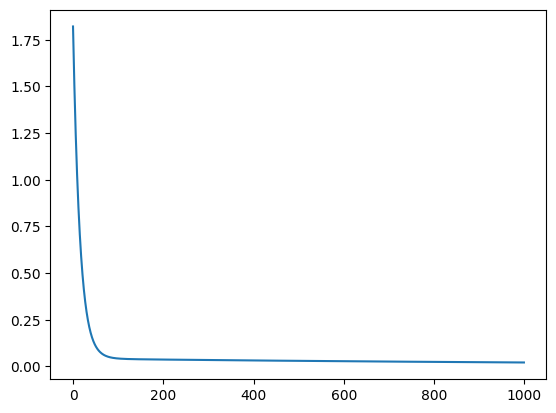

In [18]:
plt.plot(loss)
plt.show()


Сделаем прогноз на 10 шагов

In [19]:
t_test = np.linspace(t1[1], t1[1] + 10* h, 10)
X_test = x1(t_test)

x_pred = x_train[-1]
for i in range(10):
    x_pred = np.append(x_pred, par(torch.Tensor(np.expand_dims(x_pred[-3:], axis=0))).detach())

In [20]:
def plot_function2(x, t, x_train, D):
  plt.figure(figsize=(10, 10))
  plt.plot(t, x, color = 'aqua')
  plt.plot(t, x_train[D:], color = 'indigo')
  plt.show()

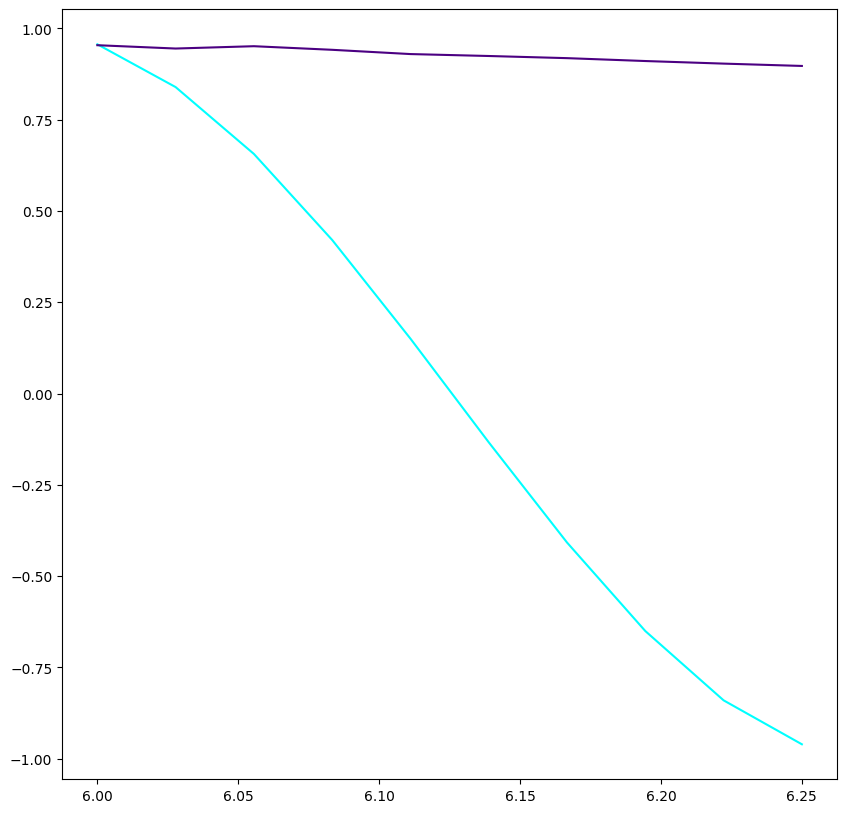

In [21]:
plot_function2(X_test, t_test, x_pred, 3)

задание 3

Сгенерируем датасет

In [22]:
x_train_, y_train_ = gen_data2(X2,Y ,5)
x_train = torch.Tensor(x_train_)
y_train = torch.Tensor(y_train_)

создадим персептрон

In [23]:
par = Parsepron(5, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(par.parameters(), lr=0.01)


обучим нейросеть

In [24]:
loss = fit(par, x_train, y_train,criterion ,optimizer , 1000)

Посмотрим на график ошибок

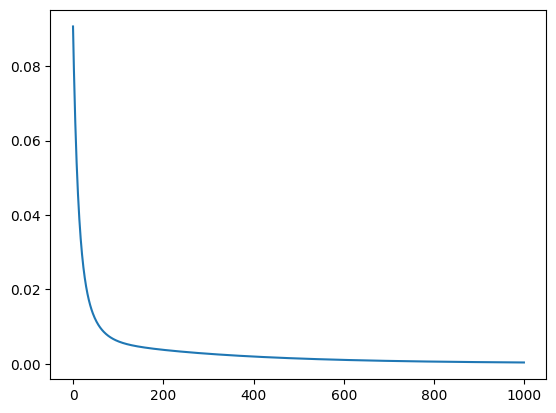

In [25]:
plt.plot(loss)
plt.show()

Посмотрим на график, где приведены реальные и предсказанные значения

In [26]:
def plot_function(t, x, D):
  plt.figure(figsize=(10, 10))
  plt.plot(t[D:], y(t[D:]), color = 'aqua')
  plt.plot(t[D:], par(x).detach(), color = 'indigo')
  plt.show()

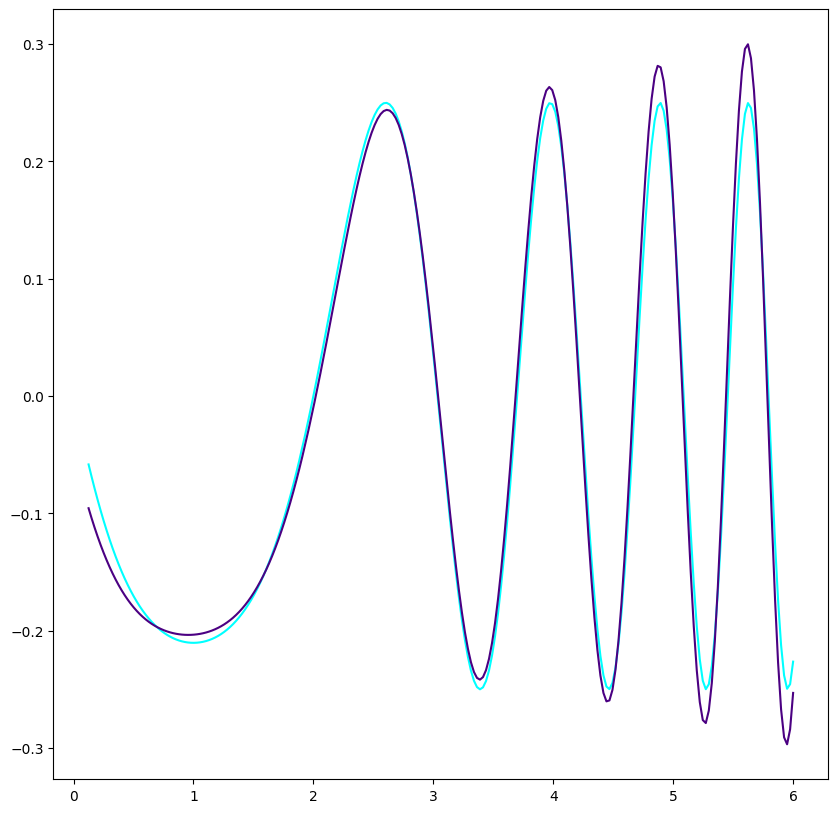

In [27]:
plot_function(T2, x_train, 5)

**Вывод**

В процессе выполнения данной лабораторной работы, я развил следующие компетенции в работе с нейронными сетями:

1. Работа с сетями, учитывающими задержки и различные временные шаги при прогнозировании;
2. Анализирование полученных результатов с помощью MSE для оценки точности обучения;
3. Приобретение навыков создания нейронных сетей в среде Python.